## Importing Libraries:

In [1]:
import numpy as nm
import matplotlib.pyplot as mtp
import pandas as pd  

## Importing the Dataset:

In [2]:
dataset = pd.read_csv('user_data.csv')
x = dataset.iloc[:, [2, 3]].values
y = dataset.iloc[:, 4].values  

## Splitting the Dataset:

In [3]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 0)  

# Feature Scaling:

In [5]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# Fitting Naive Bayes to the Training Set:

In [6]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(x_train, y_train)

GaussianNB()

# Predicting the Test Set Results:

In [8]:
y_pred = classifier.predict(x_test)  

# Making the Confusion Matrix:

In [9]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)  

# Visualizing the Training Set Results:

In [15]:
from matplotlib.colors import ListedColormap
x_set_train, y_set_train = x_train, y_train
x_set_test, y_set_test = x_test, y_test

# Define colormap with RGB values
cmap_background = ListedColormap([(0.85, 0.92, 0.95), (0.75, 0.85, 0.9)])
cmap_points = ListedColormap(['orange', 'green'])

C:\Users\ashwa\AppData\Local\Temp\ipykernel_12836\2362697799.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set_train[y_set_train == j, 0], x_set_train[y_set_train == j, 1],


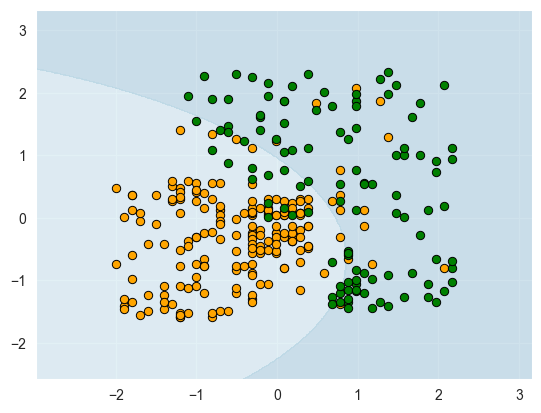

In [16]:
X1_train, X2_train = nm.meshgrid(nm.arange(start=x_set_train[:, 0].min() - 1, stop=x_set_train[:, 0].max() + 1, step=0.01),
                                 nm.arange(start=x_set_train[:, 1].min() - 1, stop=x_set_train[:, 1].max() + 1, step=0.01))
mtp.contourf(X1_train, X2_train, classifier.predict(nm.array([X1_train.ravel(), X2_train.ravel()]).T).reshape(X1_train.shape),
             alpha=0.75, cmap=cmap_background)
mtp.xlim(X1_train.min(), X1_train.max())
mtp.ylim(X2_train.min(), X2_train.max())

for i, j in enumerate(nm.unique(y_set_train)):
    mtp.scatter(x_set_train[y_set_train == j, 0], x_set_train[y_set_train == j, 1],
                c=cmap_points(i), label=f'Train - {j}', edgecolors='black', linewidth=0.7)


C:\Users\ashwa\AppData\Local\Temp\ipykernel_12836\1349795146.py:9: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  mtp.scatter(x_set_test[y_set_test == j, 0], x_set_test[y_set_test == j, 1],
C:\Users\ashwa\AppData\Local\Temp\ipykernel_12836\1349795146.py:9: UserWarning: You passed a edgecolor/edgecolors ('black') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  mtp.scatter(x_set_test[y_set_test == j, 0], x_set_test[y_set_test == j, 1],


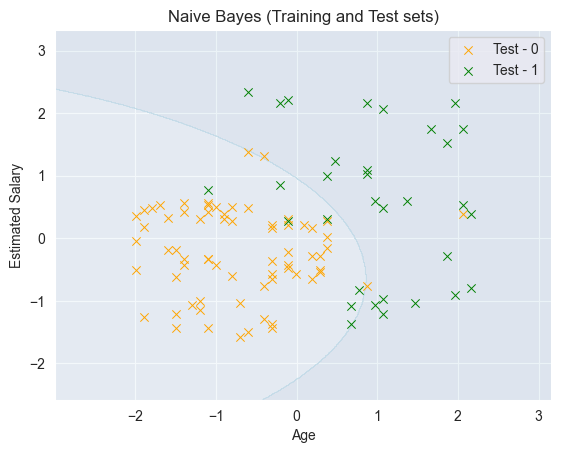

In [17]:
X1_test, X2_test = nm.meshgrid(nm.arange(start=x_set_test[:, 0].min() - 1, stop=x_set_test[:, 0].max() + 1, step=0.01),
                               nm.arange(start=x_set_test[:, 1].min() - 1, stop=x_set_test[:, 1].max() + 1, step=0.01))
mtp.contourf(X1_test, X2_test, classifier.predict(nm.array([X1_test.ravel(), X2_test.ravel()]).T).reshape(X1_test.shape),
             alpha=0.3, cmap=cmap_background)
mtp.xlim(X1_test.min(), X1_test.max())
mtp.ylim(X2_test.min(), X2_test.max())

for i, j in enumerate(nm.unique(y_set_test)):
    mtp.scatter(x_set_test[y_set_test == j, 0], x_set_test[y_set_test == j, 1],
                c=cmap_points(i), label=f'Test - {j}', marker='x', edgecolors='black', linewidth=0.7)

mtp.title('Naive Bayes (Training and Test sets)')
mtp.xlabel('Age')
mtp.ylabel('Estimated Salary')
mtp.legend()
mtp.show()